# Random Forest

If we combine several decision trees we'll get a random forest. We can use it for regression or classification problems but mostly it's used for classification.

## Random Forest Classifier

In case of classification random forest returns a mode of results that are returned by trees(so the result that is most frequent), such combination of models is called __ensemble__.

It's important to have indipendent models so they should have a low correlation value between each other. If one tree misclassifies a point, others should classify it correctly and the result will be correct - that's why we need less correlated trees so the main point is that most trees should return the correct result(not all trees)

__How should we get less correlated trees in random forest?__

As we already know we may get two different trees for the same dataset and it is used by random forest - it creates a tree from random subset of whole data(that's where 'random' comes from in name 'random forest') so each tree is trained on slightly different data and this gives us different trees. This process is called __bagging__ (Bootstrap Aggregation).

In fact if we have $n$ data point, we use $n$ points to train each tree but we may have some duplicates, for example if our dataset is $(1, 2, 3, 4, 5)$, than we may train a tree on this data: $(1, 1, 2, 4, 4)$.

Also we pass random subset of features to each tree for each split process so it can't use all features for split. It's called __feature bagging__ and it helps us to get less correlated trees.

![](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)   

As we see we have $n$ classification trees and each of them returns some result and we choose most frequent one as a final result. Mostly umber of trees are from $100$ to $1000$, we can choose this number using validation set.


We can use `RandomForestClassifier` class from `sklearn.ensemble`  module to implement random forrest classifier and we can pass several parameters to it:
* `n_estimators` - number of trees (default - `100`)
* `bootsrap` - do bagging or not (default - `True`)
* `max_samples` - if `bootstrap=True`, how many data points should is consider for each tree. default - `None`, means total number of points. if we pass int, it chooses such number of points with replacement and for float - `max_samples * ჩანაწერების სრულ რაოდენობაზე`
* `max_features` - number of randomly chosen features for each split. default - `auto` (sqrt(total number of features)). we can pass int or float or `log2` or `None`


training of random forest:

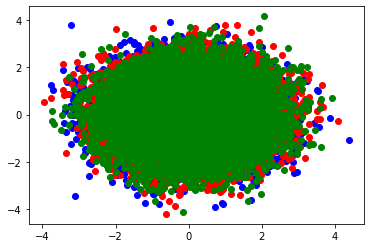

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=50000, n_classes=3, n_features=10, n_redundant=0, 
                           n_clusters_per_class=1, random_state=5)

plt.plot(X[y==0, 1], X[y==0, 4], 'bo',
            X[y==1, 1], X[y==1, 4], 'ro',
            X[y==2, 1], X[y==2, 4], 'go')

plt.show()

We have $10$ features (we used only $2$ of them for visualization) and $3$ classes, totally $50\ 000$ points.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

print('Train score: {}\nTest score: {}'.format(rfc.score(X_train, y_train), rfc.score(X_test, y_test)))

Train score: 0.999975
Test score: 0.9524


We have almost $100\%$ accuracy if we don't use regularization. This doesn't mean that we must have overfit but let's still try regularization

In [4]:
rfc = RandomForestClassifier(max_samples=0.8, max_depth=18, random_state=1)
rfc.fit(X_train, y_train)

print('Train score: {}\nTest score: {}'.format(rfc.score(X_train, y_train), rfc.score(X_test, y_test)))

Train score: 0.985175
Test score: 0.9527


We have better result on test set. We can plot some tree, list of trees are saved in `estimators_` attribute

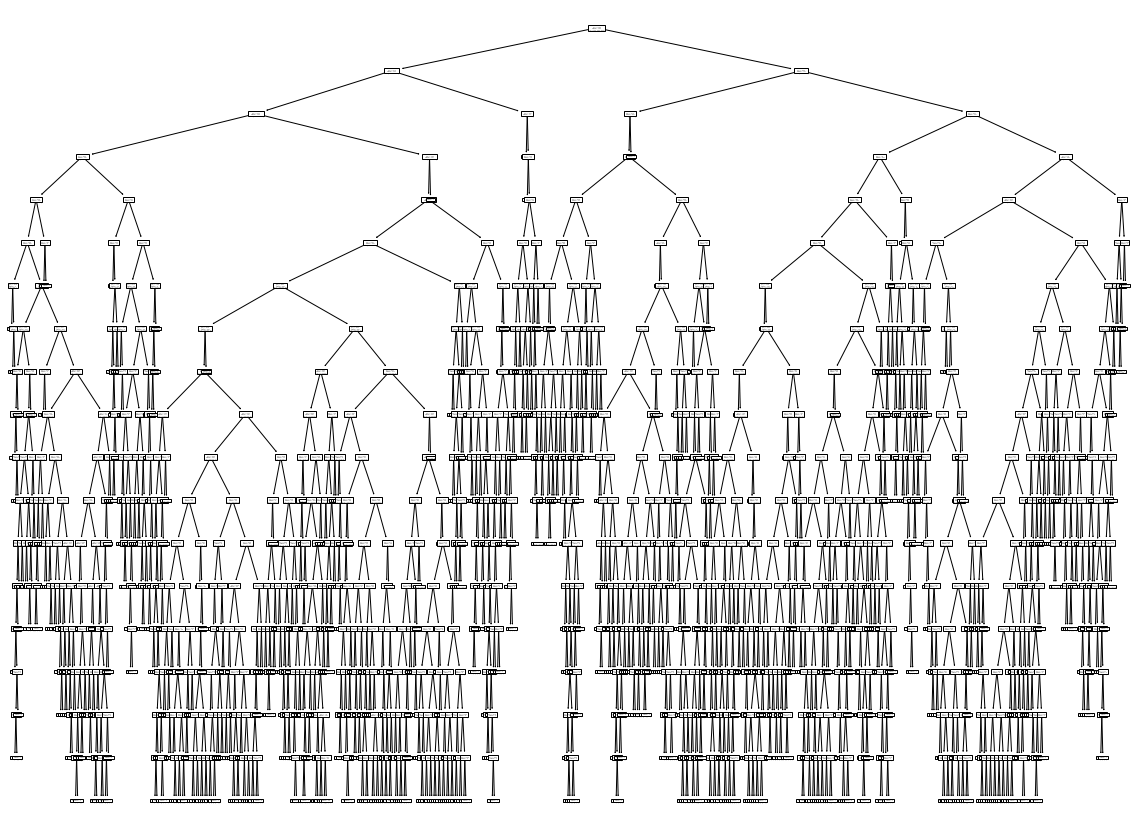

In [5]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20, 15))
plot_tree(rfc.estimators_[0], impurity=False)
plt.show()

## Random Forest Regressor

![](https://miro.medium.com/max/1434/1*ZFuMI_HrI3jt2Wlay73IUQ.png)  

We see random forest for regression task that consists of $600$ regression tree. Final result is average of each trees result

We have `RandomForestRegressor` class in `sklearn.ensemble` module. `max_features='auto'` means that we'll choose all of features, everything else is the same as it was in classification

Let's use diabetics dataset for example:

In [6]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [8]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [9]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0)

rfr.fit(X_train, y_train)

print('R2 score train: {}\nR2 score test: {}'.
      format(rfr.score(X_train, y_train), rfr.score(X_test, y_test)))

R2 score train: 0.9186608376891437
R2 score test: 0.44382153306358685


We have better result than it was for a regression tree, let's try regularization:

In [10]:
rfr = RandomForestRegressor(criterion='mae', max_depth=11, random_state=0)

rfr.fit(X_train, y_train)

print('R2 score train: {}\nR2 score test: {}'.
      format(rfr.score(X_train, y_train), rfr.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


R2 score train: 0.8938875314720705
R2 score test: 0.475572874650277


# Gradient Boosting

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest.

![](https://miro.medium.com/max/700/1*8T4HEjzHto_V8PrEFLkd9A.png)

We see on the picture that models aren't run in parallel (unlike random forrest), they run consecutively and each model tries to learn from previous and because of this, training needs more time. Gradient boosting is an algorithm where each tree tries to dicrease error from previous tree using gradient descent.

### Gradient Boosting Regressor

Model prediction for $x_i$ point is:
$$ y_i^* = F_M(x_i) = \sum_{m=1}^{M} h_m(x_i) + F_0(x_i) $$  

$M$ - number of regression trees, $F_M$ - ansamble that we get from $M$ estimators, $h_m$ - $m$ regression tree. So we just sum all estimators predictions

Initial model $F_0$ is just a constant number such that does the minimization of error. If cost function is MSE, this constant number is average of target value. Cost function:

$$J = \frac{1}{n} \sum_{i=1}^{n} (y^* - y_i)^2 $$ 

$y^*$ - model prediction, $y_i$ - correct/real answer for $i$ point, $n$ - number of points. for minimization of cost function we should take derivative of it and make it equal to $0$:  

$$ \frac {\partial J}{\partial y^*} = \frac {2}{n} \sum_{i=1}^{n} (y^* - y_i) = 0 $$ 

$$ ny^* = \sum_{i=1}^{n} y_i $$

$$ y^* = \frac{1}{n} \sum_{i=1}^{n} y_i $$  

Each next model tries to fit previous models error(not to target variable) so prediction of all $m$ model is:

$$F_m(x) = F_{m-1}(x) + h_m(x) \approx y $$  

We can write prediction of each model:

$$ h_m(x) \approx y - F_{m-1}(x)$$

This delta is derivative of (-MSE/2) along $F(x)$ in the point of $F_{m-1}(x)$:

$$ \frac{\partial \frac{1}{2} (F(x) - y)^2}{\partial F(x)} = F(x) - y = -(y - F(x)) $$  

This is why this method is connected to gradient descent.

In general each model fits to previous error:

$$ r_{i,m} = - \bigg [ \frac{\partial J(y_i, F(x_i))}{\partial F(x_i)} \bigg]_{F(x_i)=F_{m-1}(x_i)} $$  

It's the same as derivative of cost function in point of $F_{m-1}(x_i)$.
We can use learning rate for regulatization:

$$ F_m(x) = F_{m-1}(x) + \alpha h_m(x) $$  

Finally:

$$ y_i^* = F_M(x_i) = \alpha \sum_{m=1}^{M} h_m(x_i) + F_0(x_i) $$  

If $\alpha$ (learning rate) is small, we should have lots of trees, mostly  $\alpha \leq 0.1$. We can stop number of trees using early stopping

Visualization of gradient boosting:

![](https://miro.medium.com/max/2400/1*irTJIina-buTQ-2Q6kujfQ.png)  

Initial model($F_0(x)$ for us) is denoted by $h_0(x)$

We have `GradientBoostingRegressor` class in `sklearn.ensemble` module with some different parameters(from regression tree):

* `loss` - cost function:
    * `'ls'` - mean squared error. Initial model returns average of target values.
    * `'lad'` - mean absolute error. Initial model returns median of target values.
    * `'huber'` - merge of previous two.
* `alpha` - the case of`loss='huber'` it determines how resilient it is to outliers.
* `learning_rate` - learning speed
* `n_estimators` - number of trees
* `subsample` - what portion should it use for training of each tree(by default it's $1.0$ so it uses all points). If we have less than $1.0$ it's some kind of regularization as be decrease variation and it's called Stochastic Gradient Boosting. 
* `init` - initial estimator
* `n_iter_no_change` - if it's value is n and there isn't changed validation accuracy during n consecutive iteration than it's stopped so it works as early stopping and by default it's `None`
* `validation_fraction` - if `n_iter_no_change` is some number, than what portion of data should be used as validation (default - $0.1$)


Let's use diabet dataset for example:

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate=1, random_state=0)

gbr.fit(X_train, y_train)

print('R2 score train: {}\nR2 score test: {}'.
      format(gbr.score(X_train, y_train), gbr.score(X_test, y_test)))

R2 score train: 0.9992677102898788
R2 score test: -0.3406949996265358


We have overfitting without regularization

In [12]:
gbr = GradientBoostingRegressor(loss='huber', n_estimators=300, learning_rate=0.08, 
                                max_leaf_nodes=4, random_state=0)

gbr.fit(X_train, y_train)

print('R2 score train: {}\nR2 score test: {}'.
      format(gbr.score(X_train, y_train), gbr.score(X_test, y_test)))

R2 score train: 0.8167424668344299
R2 score test: 0.4237120641245835


It's ok but random forest gives us better result. In fact mostly gradient boosting is better than random forest but that's not the case

## Gradient Boosting Classifier

We have different cost function for classification. We have some of them in `GradientBoostingClassifier` class(`sklearn.ensemble` module):

* `'deviance'` - binary log loss(that we had in logistic regression). It works only for binary classification. Probability that $x_i$ point belongs to positive class:  
$$ p(x_i) = \sigma (F_M(x_i))  $$  
$\sigma$ - sigmoid function

* `'deviance'` - multiclass log loss for multiclass classification.For $(x_i, y_i)$ point: 
$$ \sum_{j=1}^{K} y_{ij} log(p_{ij})$$
$K$ - number of classes. $y_{ij}$ = $1$ if $i$ point belongs to $j$ class, else it's $0$. $p_{ij}$ - model prediction that $i$ point belongs to $j$ class.

Each iteration of gradient boosting creates $K$ trees(not $1$) and each of them returns some continuous value. We use softmax function to get probabilities:
$$ \sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} $$  
$z$ returned vector with $K$ value, for each we do calculations that we described above. example:

* ![](https://miro.medium.com/max/500/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg)  

* `'exponential'` - exponential cost(works only for binary classification)


test it:

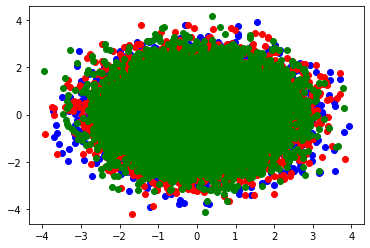

In [14]:
X, y = make_classification(n_samples=50000, n_classes=3, n_features=10, n_redundant=0, 
                           n_clusters_per_class=1, random_state=5)

# visualization
plt.plot(X[y==0, 0], X[y==0, 4], 'bo',
            X[y==1, 0], X[y==1, 4], 'ro',
            X[y==2, 0], X[y==2, 4], 'go')

plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=1, random_state=0)

gbc.fit(X_train, y_train)

print('Accuracy score train: {}\nAccuracy score test: {}'.
      format(gbc.score(X_train, y_train), gbc.score(X_test, y_test)))

Accuracy score train: 0.9732444444444445
Accuracy score test: 0.9422


with regularization:

In [17]:
gbc = GradientBoostingClassifier(subsample=0.8, max_depth=15, random_state=0)

gbc.fit(X_train, y_train)

print('Accuracy score train: {}\nAccuracy score test: {}'.
      format(gbc.score(X_train, y_train), gbc.score(X_test, y_test)))

Accuracy score train: 1.0
Accuracy score test: 0.951


accuracies(both - test and train) are increased. even train accuracy reached $100\%$

# XGBoost

XGBoost - Extreme Gradient Boosting  is improved gradient boosting.
> _When in doubt, use XGBoost_   

Some people compared several different models for the same dataset($1\ 000\ 000$ rows, $20$ features):

![](https://miro.medium.com/max/700/1*U72CpSTnJ-XTjCisJqCqLg.jpeg)  

XGBoost has the highest accuracy and it's pretty fast(only logistic regression was faster than it). XGBoost is optimized gradient boosting for software and for hardware too.  

![](https://miro.medium.com/max/700/1*FLshv-wVDfu-i54OqvZdHg.png)  

We see main optimizations for XGBoost.

System optimizations:
* __Paralelization__ - Independent subtrees of a tree are created in parallel.

* __Pruning__ - Has a different strategy of cutting branches, according to the depth of cutting and not the least costly and thus improves the working time. 

* __Hardware optimizations__ - Uses cash of computer where it stores gradients so it calculates gradients only once and uses several times.

Algorithm reinforce:
* __Regularization__ - Uses regularized cost function.

* __Sparsity awareness__ - Works optimizely for null values

* __Validation__ - Uses validation for each iteration

More details about XGBoost and math behind it can be seen [here](https://arxiv.org/pdf/1603.02754.pdf).


for `xgboost` we have: [`XGBClassifier`](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier) and [`XGBRegressor`](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor) 

classification:

In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='multi:softprob', random_state=0)
xgb.fit(X_train, y_train) 

print('Accuracy score train: {}\nAccuracy score test: {}'.
      format(xgb.score(X_train, y_train), xgb.score(X_test, y_test)))

Accuracy score train: 0.9572888888888889
Accuracy score test: 0.95


It's faster but accuracy is worse

In [19]:
xgb = XGBClassifier(objective='multi:softprob', subsample=0.8, max_depth=15, reg_lambda=0, random_state=0)
xgb.fit(X_train, y_train) 

print('Accuracy score train: {}\nAccuracy score test: {}'.
      format(xgb.score(X_train, y_train), xgb.score(X_test, y_test)))

Accuracy score train: 1.0
Accuracy score test: 0.9502


We have almost the same result as we had in regularized gradient boosting

Regression:

In [20]:
X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [21]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', random_state=0)
xgb.fit(X_train, y_train) 

print('R2 score train: {}\nR2 score test: {}'.
      format(xgb.score(X_train, y_train), xgb.score(X_test, y_test)))

R2 score train: 0.8007040252659446
R2 score test: 0.36083916613393163


In [22]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', subsample=0.9, max_depth=4, random_state=0)
xgb.fit(X_train, y_train) 

print('R2 score train: {}\nR2 score test: {}'.
      format(xgb.score(X_train, y_train), xgb.score(X_test, y_test)))

R2 score train: 0.9223580268835875
R2 score test: 0.4489095592027976


We had better result for training set when we used random forest and on test set we have similar result as we had in random forest without regularization and also it's much better than gradient boosting